In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from datetime import datetime

In [63]:
df1 = pd.read_csv('cleaned_forest_data.csv')
df2 = pd.read_csv('cleaned_grassland_data.csv')
df = pd.read_csv('cleaned_combined_data.csv')

In [83]:
distance_map = {
    '<= 50 Meters': 'Closer to observer',
    '50 - 100 Meters': 'Farther from observer',
    'Unknown': 'Closer to observer'
}

df['Distance'] = df['Distance'].map(distance_map)

In [51]:
species_analysis = df.groupby(['Location_Type'])['Scientific_Name'].value_counts().reset_index(name='count')

In [52]:
species_analysis = species_analysis[species_analysis['count']>100].reset_index(drop=True)

In [53]:
species_analysis

,Location_Type,Scientific_Name,count
0,Forest,Vireo olivaceus,692
1,Forest,Thryothorus ludovicianus,646
2,Forest,Cardinalis cardinalis,581
3,Forest,Baeolophus bicolor,541
4,Forest,Contopus virens,486
5,Forest,Empidonax virescens,436
6,Forest,Melanerpes carolinus,395
7,Forest,Polioptila caerulea,310
8,Forest,Seiurus aurocapillus,303
9,Forest,Turdus migratorius,292


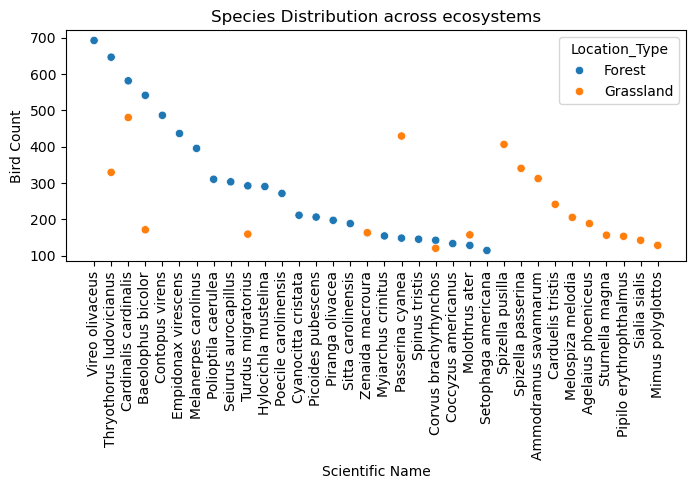

<Figure size 640x480 with 0 Axes>

In [61]:
fig = plt.figure(figsize=(8,3))
a = sns.scatterplot(
    data = species_analysis,
    x = 'Scientific_Name',
    y = 'count',
    hue = 'Location_Type'
)
plt.title('Species Distribution across ecosystems')
plt.xlabel('Scientific Name')
plt.ylabel('Bird Count')
plt.xticks(rotation=90)
plt.show()
plt.savefig('Species Distribution across ecosystem.png')

In [72]:
id_df = df.groupby(['Location_Type','ID_Method'])['Scientific_Name'].count().reset_index(name='count')

In [73]:
id_df

,Location_Type,ID_Method,count
0,Forest,Calling,2675
1,Forest,Singing,5429
2,Forest,Visualization,386
3,Grassland,Calling,1152
4,Grassland,Singing,3956
5,Grassland,Visualization,840


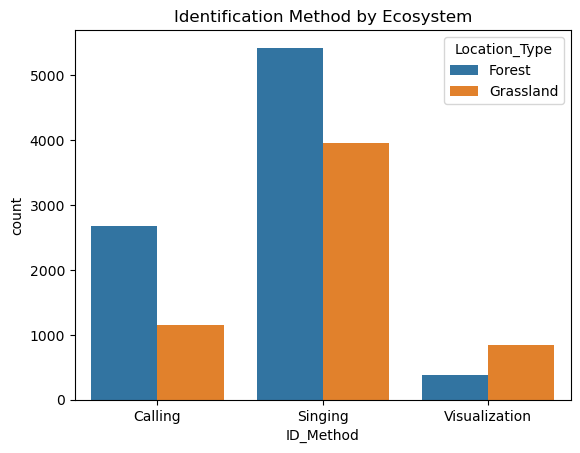

In [74]:
sns.barplot(
    data = id_df,
    x='ID_Method',
    y='count',
    hue='Location_Type'
)
plt.title('Identification Method by Ecosystem')
plt.show()

In [84]:
id_df2 = df.groupby(['Location_Type','ID_Method','Interval_Length','Distance'])['Scientific_Name'].count().reset_index(name='count')

In [85]:
id_df2

,Location_Type,ID_Method,Interval_Length,Distance,count
0,Forest,Calling,0-2.5 min,Closer to observer,735
1,Forest,Calling,0-2.5 min,Farther from observer,449
2,Forest,Calling,2.5 - 5 min,Closer to observer,362
3,Forest,Calling,2.5 - 5 min,Farther from observer,282
4,Forest,Calling,5 - 7.5 min,Closer to observer,252
5,Forest,Calling,5 - 7.5 min,Farther from observer,206
6,Forest,Calling,7.5 - 10 min,Closer to observer,254
7,Forest,Calling,7.5 - 10 min,Farther from observer,135
8,Forest,Singing,0-2.5 min,Closer to observer,1439
9,Forest,Singing,0-2.5 min,Farther from observer,1657


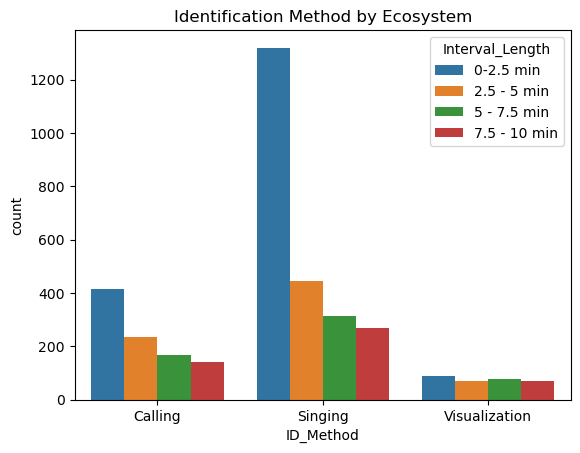

In [88]:
sns.barplot(
    data = id_df2,
    x='ID_Method',
    y='count',
    hue='Interval_Length',
    errorbar=None
)
plt.title('Identification Method by Ecosystem')
plt.show()

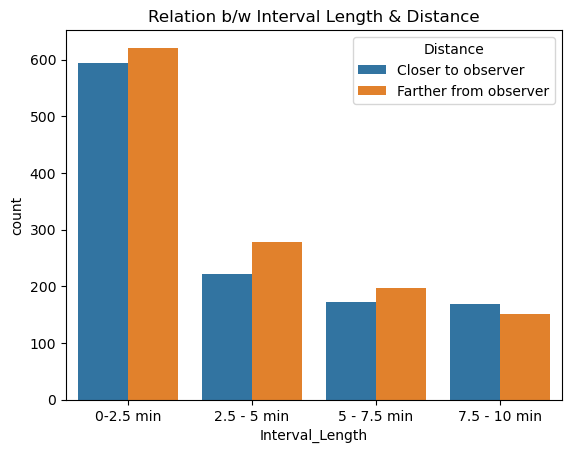

In [89]:
sns.barplot(
    data = id_df2,
    x='Interval_Length',
    y='count',
    hue='Distance',
    errorbar=None
)
plt.title('Relation b/w Interval Length & Distance')
plt.show()

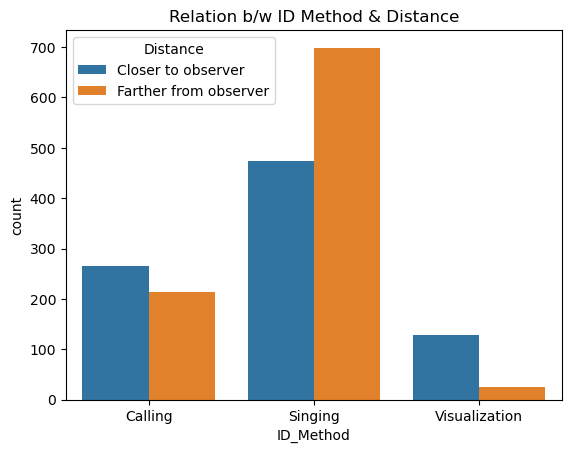

In [90]:
sns.barplot(
    data = id_df2,
    x='ID_Method',
    y='count',
    hue='Distance',
    errorbar=None
)
plt.title('Relation b/w ID Method & Distance')
plt.show()

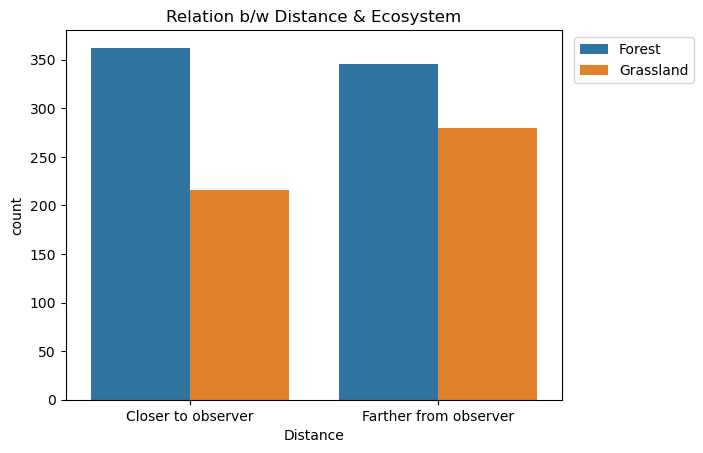

In [96]:
sns.barplot(
    data = id_df2,
    x='Distance',
    y='count',
    hue='Location_Type',
    errorbar=None
)
plt.title('Relation b/w Distance & Ecosystem')
plt.legend(loc='best',bbox_to_anchor=(1.28,1))
plt.show()